<a href="https://colab.research.google.com/github/chuancao26/islp/blob/main/LabClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 7.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=5011bc7b015d13e10d536617b1e0f84b9c498c1327432b6dc0c53ad70b975905
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [2]:
# importando librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data

from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split


In [47]:
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table
from ISLP.models import contrast

# Smarket

In [4]:
smarket = load_data("Smarket")


In [4]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [7]:
smarket.drop("Direction", axis = 1).corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [8]:
smarket.Year.value_counts()

,count
Year,
2002,252
2004,252
2003,252
2005,252
2001,242


In [13]:
smarket.Volume

,Volume
0,1.19130
1,1.29650
2,1.41120
3,1.27600
4,1.20570
...,...
1245,1.88850
1246,1.28581
1247,1.54047
1248,1.42236


<Axes: >

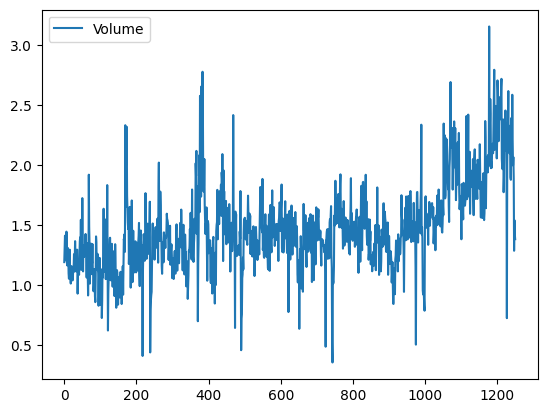

In [12]:
smarket.plot(y="Volume")

In [21]:
smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 79.6 KB


## Modelo Logit

In [5]:
# all lags and volume to classify direction
X = smarket.drop(["Today", "Year","Direction"], axis = 1)
y = smarket.Direction.map({"Down":0, "Up":1})
y = y.astype(float)

X = sm.add_constant(X)

In [6]:
glm  = sm.GLM(y,
              X,
              family=sm.families.Binomial())
results = glm.fit()
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Fri, 21 Nov 2025   Deviance:                       1727.6
Time:                        02:07:10   Pearson chi2:                 1.25e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.002868
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.6

In [27]:
results.pvalues

,0
const,0.600700
Lag1,0.145232
Lag2,0.398352
Lag3,0.824334
Lag4,0.851445
Lag5,0.834998
Volume,0.392404


In [7]:
probs = results.predict()
probs.shape

(1250,)

### Confusion table


In [8]:
labels = np.array(["Down"]*1250)
labels[probs > 0.5] = "Up"

In [9]:
labels

array(['Up', 'Down', 'Down', ..., 'Up', 'Up', 'Up'], dtype='<U4')

In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(labels, smarket.Direction))

[[145 141]
 [457 507]]


### Train and test data

In [49]:
mask = smarket.Year < 2005
X = smarket.drop(["Today", "Year", "Direction"],
                 axis = 1)
y = smarket.Direction.map({"Down":0, "Up":1})
y = y.astype(float)
X = sm.add_constant(X)

In [50]:
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]

model2 = sm.GLM(y_train,
                X_train,
                family=sm.families.Binomial())
results2 = model2.fit()
probs = results2.predict(exog=X_test)


In [51]:
labels = np.array(["Down"] * 252)
labels[probs > 0.5] = "Up"
print(confusion_matrix(labels, smarket.Direction[~mask]))

[[77 97]
 [34 44]]


In [52]:
np.mean(labels == smarket.Direction[~mask])

np.float64(0.4801587301587302)

### modelo con los 2 mejores predictores

In [55]:
X = smarket[["Lag1", "Lag2"]]
y = smarket.Direction

In [56]:
mask = smarket.Year < 2005

In [58]:
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]


In [59]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

y_train = y_train.map({"Down":0, "Up":1})

In [60]:
# modelo
glm_train = sm.GLM(y_train,
                  X_train,
                  family=sm.families.Binomial())
results_train = glm_train.fit()
probs = results_train.predict(exog=X_test)



In [62]:
labels = np.array(["Down"] * 252)
labels[probs > 0.5] = "Up"
print(confusion_matrix(labels, y_test))

[[ 35  35]
 [ 76 106]]


In [63]:
np.mean(labels == y_test)

np.float64(0.5595238095238095)

### haciendo una prediccion

In [65]:
new_data = pd.DataFrame(
    {
        'Lag1': [1.2, 1.5],
        'Lag2': [1.1, -0.8]
    }
)

In [67]:
new_data = sm.add_constant(new_data)
results_train.predict(new_data)

,0
0,0.479146
1,0.496094
